# Paper Figures

## Imports

In [1]:
# Python standard library
import sys
import csv
import os

# Scientific computing

import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.ndimage
import sklearn.mixture

#plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

# Program specific
sys.path.append('C:\Users\SiwyLab\Desktop\pore_stats\pore_stats\oi')
import optical_imaging as oi
import oi_file
import image_processing


# Jupyter
from IPython.display import HTML

## Load Data

In [2]:
date = '10-10-2017'
particle = '293-T_0'
channel = '10-20-10_1'
file_index = '0'

base_path = oi_file.data_base_path

oi_vid_file_path = base_path + date + '/'+ particle + '/' + channel + '/oi/bin/test_camera_' + file_index
oi_events_file_path = base_path + date + '/' + particle + '/' + channel + '/oi/events/test_camera_' + file_index + '_events' + '.json'

## Load Video

In [3]:
# Load video
reload(oi)
res_x = 384
res_y = 112
oi_fps = 250000
exposure = 500*10**(-9.)
oi_vid = oi_file.Video(oi_vid_file_path, res_x, res_y, oi_fps, exposure)

# Load events
oi_events = oi_file.open_event_file_json(oi_events_file_path)

print 'loaded', len(oi_events), 'oi events'

loaded 997 oi events


## Figure #1

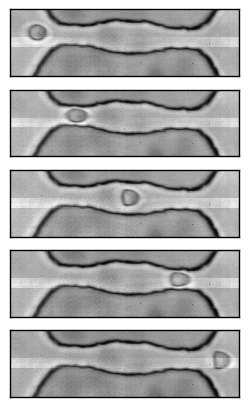

In [4]:

event_num = 72
oi_event = oi_events[event_num]
index_pos = [11,15,19,23,26]
ts = oi_event.get_tf()[index_pos]
n = len(ts)
fig, axes = plt.subplots(n,1,figsize = (5,5))

for i in range(n):
    frame = oi_vid.get_frame(int(ts[i]))
    plt.sca(axes[i])
    plt.imshow(frame, cmap = 'gray',origin = 'lower')
    plt.xticks([])
    plt.yticks([])
plt.show()

## Figure #2

In [3]:
calculations_base_path = oi_file.ellipse_base_path

num_files = 2
dates = ['10-10-2017']*2
particles = ['HCT-116_1']*2
channels = ['10-20-10_0','10-20-10_1']
indices = ['0']*2


calculations_file_paths = [calculations_base_path + dates[i] + '/' + particles[i] + '/' + channels[i] + '/' + indices[i] + '/' + 'calculations' for i in range(num_files)]


# Get header
with open(calculations_file_paths[0], 'r') as file_handle:
    file_reader = csv.reader(file_handle, delimiter = ',')
    header = file_reader.next()
    
header_dict = {header[i]:i for i in range(len(header))}
    
    
# Open calculations
calculationss = []
for i in range(num_files):
    calculations = np.genfromtxt(calculations_file_paths[i], delimiter = ',', skip_header = 1)    
    calculationss.append(calculations)
    
# Get number of events in each file
num_events = []
for i in range(num_files):
    num_events.append(int(np.max(calculationss[i][:,0])))

In [4]:
def generate_file_path(file_index):
    return dates[file_index] + '/' + particles[file_index] + '/' + channels[file_index] + '/' + indices[file_index] + '/'

def get_event_calculations(calculations, event_index):
    event_calculations = np.copy(calculations[calculations[:,header_dict['event_num']] == event_index])
    return event_calculations

def get_event_column(calculations, event_index, column_index):
    return np.copy(calculations[calculations[:,header_dict['event_num']] == event_index][:,column_index])

In [5]:
print header_dict
save = False

{'ellipse_num': 1, 'speed_pix/frame': 17, 'r_um': 14, 'xc_um': 5, 'r_pix': 13, 'yc_um': 8, 'a_um': 10, 'yc_pix': 7, 'speed_m/s': 18, 'tf': 2, 'a_pix': 9, 'b_um': 12, 'b_pix': 11, 'event_num': 0, 'y_pix': 6, 'xc_pix': 4, 'theta_rad': 16, 'aspect-ratio': 15, 'x_pix': 3}


In [19]:
xc_umss=[]
aspectss = []
velocitiess =[]

for i in range(num_files):
    xc_umss.append(calculationss[i][:, header_dict['xc_um']])
    aspectss.append(calculationss[i][:, header_dict['aspect-ratio']])
    velocitiess.append(calculationss[i][:, header_dict['speed_m/s']])
print(velocitiess)

[array([       0.        ,  3489550.66948813,  4517614.16219755, ...,
        5057569.00757695,  4486198.47053361,        0.        ]), array([       0.        ,  2280561.56611772,  3314454.94016465, ...,
        4972365.6202068 ,  4418455.9548113 ,        0.        ])]


In [30]:
# Raw data
aspect_avgss = []
aspect_stdss = []
xc_windowss = []


for i in range(num_files):


    # Avg.
    avg_width = 3
    num_avgs = (np.max(xc_umss[i]) - np.min(xc_umss[i])) / avg_width

    xc_windows = []
    aspect_avgs = []
    aspect_stds = []
    for j in range(int(num_avgs) + 1):
        low = np.min(xc_umss[i]) + j*avg_width
        high = low + avg_width
    
        xc_windows.append((low + high)/2.)
        aspect_avgs.append(np.nanmean(aspectss[i][(xc_umss[i] > low) & (xc_umss[i] < high)]))
        aspect_stds.append(np.nanstd(aspectss[i][(xc_umss[i] > low) & (xc_umss[i] < high)]))
    
    xc_windowss.append(np.array(xc_windows))
    aspect_avgss.append(np.array(aspect_avgs))
    aspect_stdss.append(np.array(aspect_stds))

In [31]:
print(aspect_stdss)

[array([ 0.06812352,  0.06725223,  0.06655147,  0.07645953,  0.08600794,
        0.08230733,  0.08361835,  0.10179226,  0.1040484 ,  0.09596951,
        0.08445493,  0.08725829,  0.08679248,  0.0838593 ,  0.1692224 ,
        0.08599867,  0.07208486,  0.08239795,  0.06909852,  0.06518816,
        0.06443392,  0.06549583,  0.06573189,  0.07234145,  0.05747015,
        0.06423136,  0.05879246,  0.05779485,  0.07608419,  0.06704799,
        0.06209705,  0.06370075,  0.05878804,  0.07272942,  0.04861973,
        0.07171483,  0.06245157,  0.07112467,  0.07273722,  0.06186714,
        0.07363343,  0.08675479,  0.07578221,  0.09844487,  0.07155964,
        0.07251582,  0.07804152,  0.10412635,  0.0816342 ,  0.08604165,
        0.08062832,  0.06625223,  0.07174365,  0.06927866,  0.11367939,
        0.06368093,  0.06749361,  0.05857277,  0.06034865,  0.05398129,
        0.09619134,  0.06964594,  0.0521047 ,  0.06287611,  0.11434413,
        0.06434257,  0.06513433,  0.08033545,  0.06461931]), ar

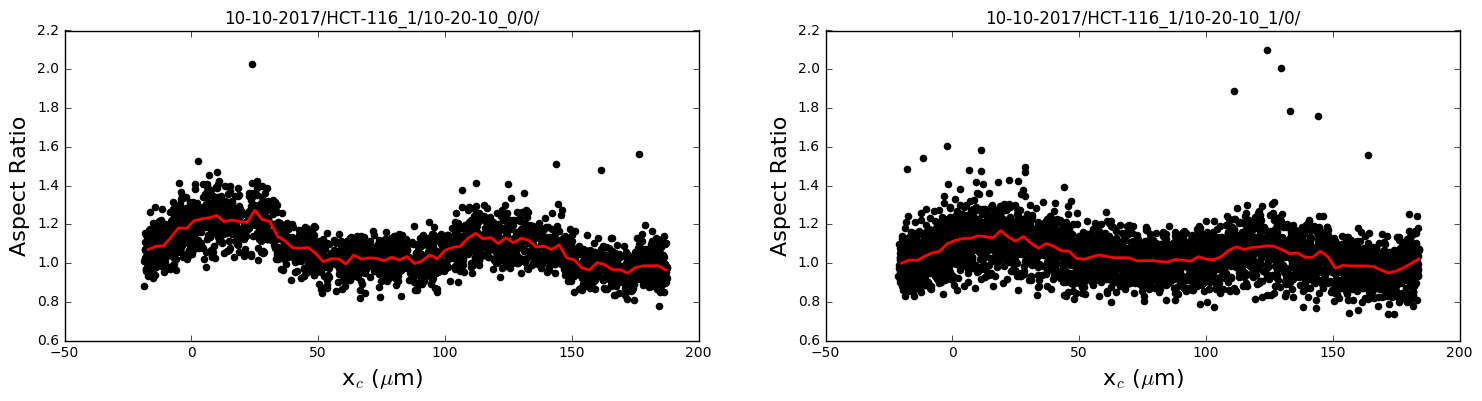

In [8]:
fig, axes = plt.subplots(1,2,figsize = (18,4))
    
axis_size = 16
    
fig.sca(axes[0])   
plt.scatter(xc_umss[0], aspectss[0],color = 'black')
plt.plot(xc_windowss[0], aspect_avgss[0], zorder = 3, color = 'red', lw = 2)
plt.xlabel('x$_{c}$ ($\mu$m)',size=axis_size)
plt.ylabel('Aspect Ratio',size=axis_size)
plt.title(generate_file_path(0))

fig.sca(axes[1])
plt.scatter(xc_umss[1], aspectss[1],color = 'black')
plt.plot(xc_windowss[1], aspect_avgss[1], zorder = 3, color = 'red', lw = 2)
plt.xlabel('x$_{c}$ ($\mu$m)',size=axis_size)
plt.ylabel('Aspect Ratio',size=axis_size)
plt.title(generate_file_path(1))










#plt.savefig(oi_file.ellipse_base_path + generate_file_path(0) + '293-T_flow_rates')

plt.show()

In [29]:
v = []

for i in range(num_events[0]):
    v.append(velocitiess[0][calculationss[0][:,0] == i])
    
print(v[0],v[1],v[2])

(array([       0.        ,  3489550.66948813,  4517614.16219755,
        4710637.23192109,  4350854.24721253,  3970966.78188511,
        3776408.18989041,  4055777.64522427,  4625540.15382082,
        4851834.80995876,  4340499.95770053,  3611309.98128646,        0.        ]), array([       0.        ,  3627955.4373805 ,  4460208.79959177,
        4481833.48261996,  3976487.25409035,  3643578.56556993,
        3568385.75376368,  3863720.83669191,  4512985.13341281,
        4756426.32602824,  4338010.9640165 ,  3684364.13150667,        0.        ]), array([       0.        ,  3066980.68328977,  4179479.41211012,
        5027608.23742155,  4992848.34751646,  4419569.15239317,
        4157197.33174557,  4470668.65537929,  5160606.04862435,
        5336074.4375081 ,  4741297.21393458,        0.        ]))


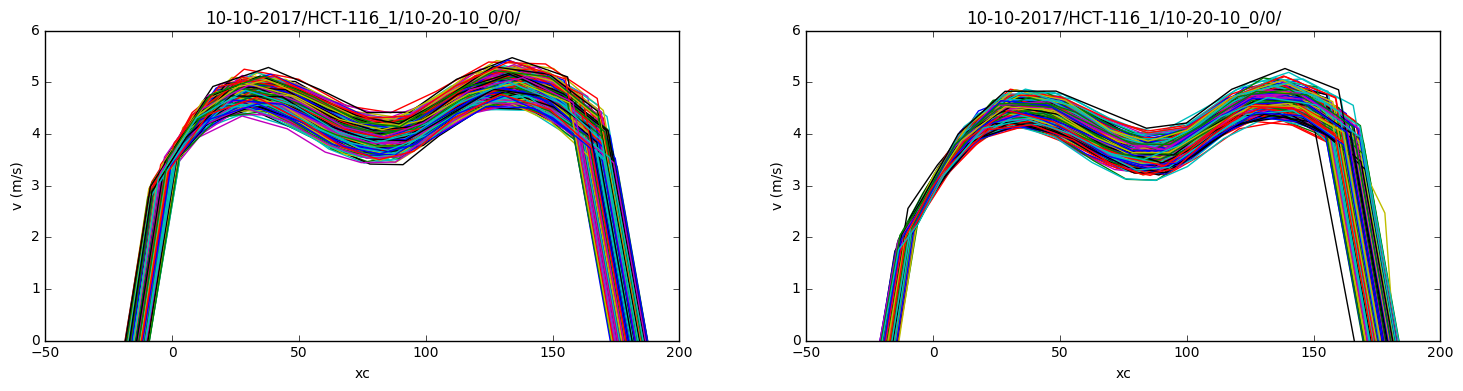

In [17]:
# Raw data

fig, axes = plt.subplots(1,2,figsize = (18,4))
    
axis_size = 16


file_index = 0


                            

fig.sca(axes[0])
for i in range(num_events[file_index]):
    xc_ums = xc_umss[0][calculationss[0][:,0] == i]
    velocities = velocitiess[0][calculationss[0][:,0] == i]/10**6.
    
    plt.plot(xc_ums, velocities)
    

plt.title(generate_file_path(file_index))
plt.xlabel('xc')
plt.ylabel('v (m/s)')

plt.ylim(0, 6)
    
fig.sca(axes[1])    
for i in range(num_events[file_index]):
    xc_ums = xc_umss[1][calculationss[1][:,0] == i]
    velocities = velocitiess[1][calculationss[1][:,0] == i]/10**6.
    
    plt.plot(xc_ums, velocities)
    

plt.title(generate_file_path(file_index))
plt.xlabel('xc')
plt.ylabel('v (m/s)')

plt.ylim(0, 6)



if save:
    plt.savefig(oi_file.ellipse_base_path + generate_file_path(file_index) + 'velocities.png')
    
plt.show()